<a href="https://colab.research.google.com/github/melihkurtaran/DNA_hackathon/blob/numpy/MainCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install gif2numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import gif2numpy
import cv2
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image,ImageDraw

%matplotlib inline
import numpy as np
import os

In [5]:
workdir = '/content/drive/MyDrive/EDISS Winter School/EDISS_winter_school/'
data_path = workdir + '/data/aemet/10min/'
yaml_path = workdir + 'radars.yaml'

In [6]:
os.listdir(data_path+'/va/20220219')

['aemet_va_202202190010.gif',
 'aemet_va_202202190000.gif',
 'aemet_va_202202190040.gif',
 'aemet_va_202202190030.gif',
 'aemet_va_202202190020.gif',
 'aemet_va_202202190050.gif',
 'aemet_va_202202190130.gif',
 'aemet_va_202202190100.gif',
 'aemet_va_202202190110.gif',
 'aemet_va_202202190120.gif',
 'aemet_va_202202190200.gif',
 'aemet_va_202202190220.gif',
 'aemet_va_202202190150.gif',
 'aemet_va_202202190210.gif',
 'aemet_va_202202190140.gif',
 'aemet_va_202202190310.gif',
 'aemet_va_202202190300.gif',
 'aemet_va_202202190250.gif',
 'aemet_va_202202190240.gif',
 'aemet_va_202202190230.gif',
 'aemet_va_202202190320.gif',
 'aemet_va_202202190340.gif',
 'aemet_va_202202190400.gif',
 'aemet_va_202202190350.gif',
 'aemet_va_202202190330.gif',
 'aemet_va_202202190430.gif',
 'aemet_va_202202190440.gif',
 'aemet_va_202202190450.gif',
 'aemet_va_202202190420.gif',
 'aemet_va_202202190410.gif',
 'aemet_va_202202190530.gif',
 'aemet_va_202202190500.gif',
 'aemet_va_202202190540.gif',
 'aemet_va

In [7]:

np_frames, extensions, image_specifications = gif2numpy.convert(data_path+'va/20220219/aemet_va_202202190010.gif')

In [8]:

the_frame = np.array(np_frames[0])

In [9]:
print(the_frame.shape)

(530, 480, 3)


In [10]:
h=the_frame.shape[0]
w=the_frame.shape[1]

the_frame =  the_frame[:w,:,:]
the_frame = cv2.cvtColor(the_frame, cv2.COLOR_BGR2RGB)

print(the_frame.shape)

(480, 480, 3)


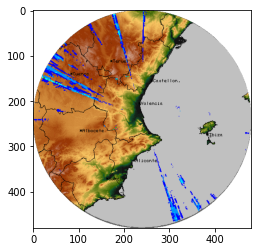

In [11]:
the_frame_pil = Image.fromarray(the_frame)
alpha = Image.new('L', (the_frame.shape[0],the_frame.shape[1]),0)
draw = ImageDraw.Draw(alpha)
draw.pieslice([0,0,w,w],0,360, fill=255)
npAlpha=np.array(alpha)

the_frame_ed =np.dstack((the_frame,npAlpha))
imshow(the_frame_ed)

In [12]:
import yaml
from yaml.loader import SafeLoader

# Open the file and load the file
with open(yaml_path) as f:
    data = yaml.load(f, Loader=SafeLoader)
    print(data)

{'metadata': {'RADAR_CODE': {'rdr_code': {'type': 'string', 'lenght': 2}, 'latitude': {'type': 'decimal', 'units': 'degrees'}, 'longitude': {'type': 'decimal', 'units': 'degrees'}, 'radius': {'type': 'integer', 'units': 'km'}, 'name': {'type': 'string'}}}, 'data': {'CC': {'rdr_code': 'cc', 'latitude': 39.42882, 'longitude': -6.28538, 'radius': 240, 'name': 'Cáceres'}, 'VA': {'rdr_code': 'va', 'latitude': 39.17629, 'longitude': -0.25102, 'radius': 240, 'name': 'Valencia'}, 'CO': {'rdr_code': 'co', 'latitude': 43.16902, 'longitude': -8.52691, 'radius': 240, 'name': 'Coruña'}, 'CA': {'rdr_code': 'ca', 'latitude': 28.01878, 'longitude': -15.6145, 'radius': 240, 'name': 'Canarias'}, 'SE': {'rdr_code': 'se', 'latitude': 37.68743, 'longitude': -6.33447, 'radius': 240, 'name': 'Sevilla'}, 'MU': {'rdr_code': 'mu', 'latitude': 38.26438, 'longitude': -1.18954, 'radius': 240, 'name': 'Murcia'}, 'ML': {'rdr_code': 'ml', 'latitude': 36.61344, 'longitude': -4.65936, 'radius': 240, 'name': 'Málaga'}, 

In [13]:
ba_data = data['data']['BA']
ba_data

{'rdr_code': 'ba',
 'latitude': 41.4082,
 'longitude': 1.88499,
 'radius': 240,
 'name': 'Barcelona'}

Latitude: 1 deg = 110.574 km. Longitude: 1 deg = 111.320*cos(latitude) km.

In [32]:
frame_lat_diff = (1/110.574)
frame_long_diff = 1/(111.320*np.cos(ba_data['latitude']))

In [20]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from sklearn.cluster import KMeans 
from matplotlib import colors
from collections import Counter
import matplotlib.pyplot as plt 

In [ ]:
def get_sensor_mask(img):
  # color pallete in bgr
  sensor_color_list = [[0, 255, 255],[0, 192, 0],[0, 255, 0],[0, 127, 255],[90, 0, 200],[252, 0, 0],[252, 148, 0],[252, 252, 0],[35, 131, 67],[0, 187, 255],[0, 0, 255]]
  mask_img = np.empty(img.shape)
  for row_i in range(img.shape[0]):
    for pixel_i in range(img.shape[1]):
      if list(img[row_i, pixel_i]) not in sensor_color_list:
        mask_img[row_i, pixel_i] = [0,0,0]
      else:
        mask_img[row_i, pixel_i] = img[row_i, pixel_i]
  return mask_img


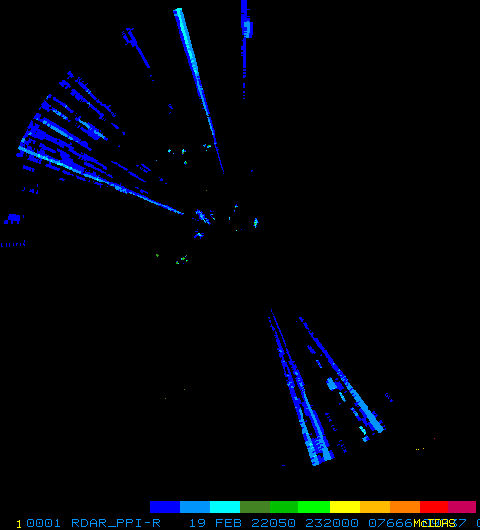

In [130]:
np_frames, extensions, image_specifications = gif2numpy.convert(data_path+'va/20220219/aemet_va_202202192320.gif')
im2 = get_sensor_mask(np.array(np_frames[0]))
cv2_imshow(im2)

In [15]:
the_frame_full = np.array(np_frames[0])

In [94]:
legend_bottom = the_frame_full[w+21:h-17, 150:w-4, :]
b_legend_image = cv2.cvtColor(legend_bottom, cv2.COLOR_BGR2RGB)
cv2_imshow(b_legend_image)

In [90]:
cv2_imshow(legend_bottom)

In [92]:
b_legend_image[2, 10]

array([  0,   0, 252], dtype=uint8)

In [100]:
flat_legend_bottom = legend_bottom.reshape(legend_bottom.shape[0]*legend_bottom.shape[1], 3)
flat_legend_bottom

array([[252,   0,   0],
       [252,   0,   0],
       [252,   0,   0],
       ...,
       [ 90,   0, 200],
       [ 90,   0, 200],
       [ 90,   0, 200]], dtype=uint8)

In [104]:
legend_bottom_list = [list(t) for t in set(tuple(element) for element in flat_legend_bottom)]
legend_bottom_list

[[0, 255, 255],
 [0, 192, 0],
 [0, 255, 0],
 [0, 127, 255],
 [90, 0, 200],
 [252, 0, 0],
 [252, 148, 0],
 [252, 252, 0],
 [35, 131, 67],
 [0, 187, 255],
 [0, 0, 255]]

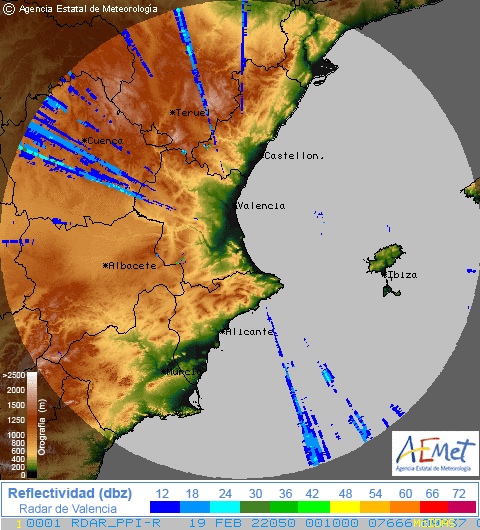

In [122]:
image_frame = np.array(np_frames[0])
cv2_imshow(image_frame)

In [123]:
updated_frame = np.empty(image_frame.shape)

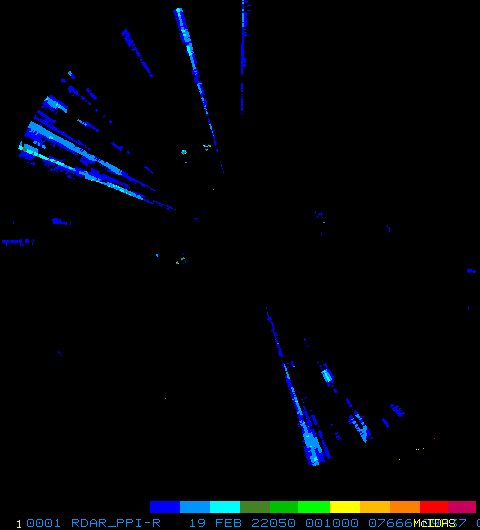

In [124]:
for row_i in range(image_frame.shape[0]):
  for pixel_i in range(image_frame.shape[1]):
    if list(image_frame[row_i, pixel_i]) not in legend_bottom_list:
      updated_frame[row_i, pixel_i] = [0,0,0]
    else:
      updated_frame[row_i, pixel_i] = image_frame[row_i, pixel_i]

cv2_imshow(updated_frame)

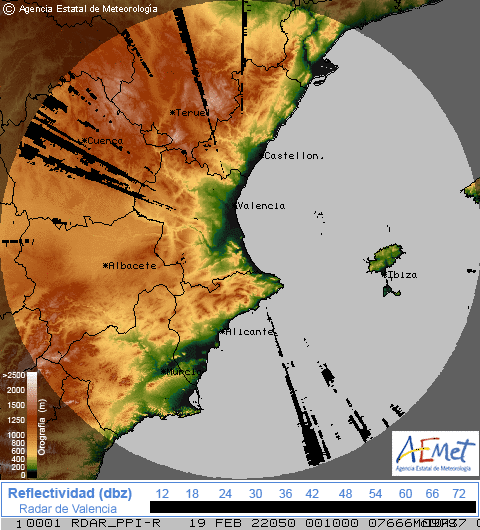

In [126]:
subtracted_img = image_frame - updated_frame
cv2_imshow(subtracted_img)